<a href="https://colab.research.google.com/github/Octaxx/DLI/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


url = "https://raw.githubusercontent.com/Octaxx/DLI/main/CEAS_08.csv"
df = pd.read_csv(url)

In [3]:
# STEP 2: Remove missing values
df = df.dropna()

# STEP 3: Check for missing values after cleaning
print("Missing values after dropna():\n")
print(df.isnull().sum())
print("\n")

# STEP 4: Print total rows after cleaning
print(f"Total rows after cleaning: {len(df)}\n")

Missing values after dropna():

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64


Total rows after cleaning: 38669



In [4]:
# STEP 5: Check and print original class counts
print("Original Email Type Counts:\n")
print(f"Phishing emails (1): {df['label'].value_counts().get(1, 0)}")
print(f"Safe emails (0): {df['label'].value_counts().get(0, 0)}\n")

# STEP 6: Show a few examples
print("Phishing emails examples:\n")
display(df[df['label'] == 1][['subject', 'body']].head(5))
print("\nSafe emails examples:\n")
display(df[df['label'] == 0][['subject', 'body']].head(5))
print("\n")


Original Email Type Counts:

Phishing emails (1): 21827
Safe emails (0): 16842

Phishing emails examples:



,subject,body
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi..."
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...
5,From Caroline Aragon,\n\n\n\n\nYo wu urS mo ou go rc ebo eForM rgi ...



Safe emails examples:



,subject,body
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...
8,[Bug 5780] URI processing turns uuencoded stri...,http://issues.apache.org/SpamAssassin/show_bug...
15,RE: Trial IRC Certificate Application,"\nPlelim,\n\nJust to remind you that if a cert..."
18,"Re: [opensuse] Why can't I use ""shutdown now"" ...",Carlos E. R. wrote: > -----BEGIN PGP SIGNED ME...
19,Re: Fwd: [opensuse] Re: openSUSE Boxed Editions,Steve Jacobs wrote: > ---------- Forwarded mes...


In [5]:
# STEP 7: Balance the classes
# Separate majority and minority classes
majority = df[df['label'] == 1]
minority = df[df['label'] == 0]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority and upsampled minority
df_balanced = pd.concat([majority, minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# STEP 8: Check balanced class counts
print("✅ Balanced Email Type Counts:\n")
print(f"Phishing emails (1): {df_balanced['label'].value_counts().get(1, 0)}")
print(f"Safe emails (0): {df_balanced['label'].value_counts().get(0, 0)}\n")


# STEP 9: Show first 100 rows (optional)
df_balanced.head(100)

✅ Balanced Email Type Counts:

Phishing emails (1): 21827
Safe emails (0): 21827



,sender,receiver,date,subject,body,label,urls
0,Anton Cline <WilliamsleadsmenLester@newadvent....,"chae.m.schlenz@gvc.ceas-challenge.cc, izumi568...","Wed, 06 Aug 2008 12:29:02 -0100","Produce Stronger, Rock Hard Erections.","\nJust 2 pills a day, for incredible and quick...",1,1
1,Guido van Rossum <hoauf@python.org>,Christian Heimes <wluhe@cheimes.de>,"Tue, 05 Aug 2008 20:59:19 -0800",Re: [Python-Dev] Buildbots for trunk are all red,"On Thu, Feb 28, 2008 at 12:23 PM, Christian He...",0,1
2,Vincent Cunniffe <vmxopgo@cunniffe.net>,"""Hamilton, David (TSG C&I)"" <dnyds.cnocitsp0@h...","Fri, 08 Aug 2008 01:41:42 +0000",Re: [ILUG] MySQL Database question,"Hamilton, David (TSG C&I) wrote:\n> The plan w...",0,0
3,Per Jessen <uee@computer.org>,wkilxloc@opensuse.org,"Fri, 08 Aug 2008 07:58:31 +0100",Re: [opensuse] [OT] unstable system - still tr...,Randall R Schulz wrote:\n\n> On Saturday 01 Ma...,0,0
4,iGo eAlerts <phbsczzmw@ewaymail.com>,"""user6@gvc.ceas-challenge.cc"" <user6@gvc.ceas-...","Tue, 05 Aug 2008 22:01:32 -0500",Get the Power of Love,Get the Power of Love with iGo.\n\niGo's got t...,0,1
...,...,...,...,...,...,...,...
95,Guido van Rossum <hoauf@python.org>,"Christian Heimes <wluhe@cheimes.de>, Benjamin ...","Wed, 06 Aug 2008 05:39:51 -0500",Re: [Python-Dev] 2.6 and 3.0 tasks,"On Sun, Mar 16, 2008 at 11:57 AM, Benjamin Pet...",0,1
96,Dane Stafford <MontykeyesWilkinson@findlaw.com>,r.neddiecvtqg@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 12:50:44 -0100","replica Watches! rolex, patek philippe, vacher...",\nQUALITY REPLICA WATCHES! 100% EXACT! ALL BRA...,1,1
97,Ricky Bowling <dccqe@bovislendlease.com>,user7-ext3@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 17:44:08 +0600",Save on quality software!,"\n Need some software urgently? Purchase, down...",1,1
98,Kathryn Blackmond Laskey <voqydpj@gmu.edu>,faq@engr.orst.edu,"Thu, 07 Aug 2008 02:33:36 -0400",[UAI] CFP: Workshop on Uncertainty Reasoning f...,\n********************************************...,0,1


In [6]:
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

X = df['text']
y = df['label']

In [7]:
# Sets how many times to train & test the model
num_runs = 10
total_accuracy = 0

for run in range(num_runs):
    print(f"\n=== Run {run + 1}/{num_runs} ===")

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2), min_df=2)
    X_tfidf = vectorizer.fit_transform(X)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=run, stratify=y)

    # Naive Bayes Model
    model = MultinomialNB(alpha=1.0)
    model.fit(X_train, y_train)

    # Predictions & Evaluation
    y_pred = model.predict(X_test)

    # Accuracy for this run
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    print("Accuracy:", accuracy)

avg_accuracy = total_accuracy / num_runs
print(f"\n✅ Average Accuracy over {num_runs} runs: {avg_accuracy:.4f}")


=== Run 1/10 ===
Accuracy: 0.9710369795707267

=== Run 2/10 ===
Accuracy: 0.973881561934316

=== Run 3/10 ===
Accuracy: 0.9711662787690716

=== Run 4/10 ===
Accuracy: 0.9733643651409362

=== Run 5/10 ===
Accuracy: 0.9731057667442462

=== Run 6/10 ===
Accuracy: 0.9722006723558314

=== Run 7/10 ===
Accuracy: 0.974269459529351

=== Run 8/10 ===
Accuracy: 0.9705197827773467

=== Run 9/10 ===
Accuracy: 0.9712955779674166

=== Run 10/10 ===
Accuracy: 0.9715541763641066

✅ Average Accuracy over 10 runs: 0.9722


In [8]:
# Save the model
import pickle
with open('/content/drive/My Drive/Colab Notebooks/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('/content/drive/My Drive/Colab Notebooks/vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
print("\n======== Email Spam Detection ========")

# Take user input
user_input = input("Enter your email text: ")

user_input_tfidf = vectorizer.transform([user_input])
prediction = model.predict(user_input_tfidf)

# Show result
if prediction[0] == 1:
    print("🔴 This email is classified as: Phishing / Spam")
else:
    print("🟢 This email is classified as: Safe / Not Phishing")


======== Email Spam Detection ========
Enter your email text: hi please contact this number 012894347, to reconfirm your booking on your reservation
🟢 This email is classified as: Safe / Not Phishing


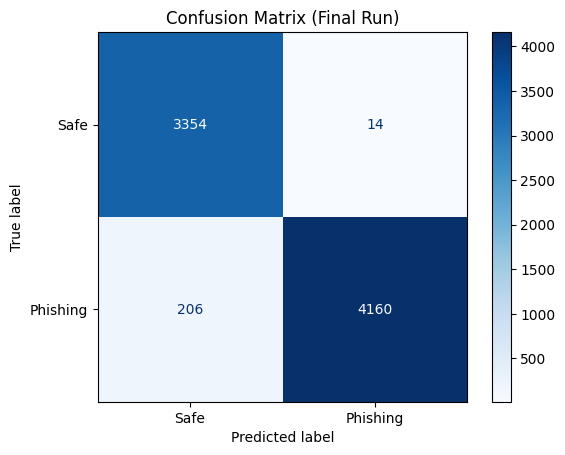

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix from the last run
cm = confusion_matrix(y_test, y_pred)

# Display it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix (Final Run)")
plt.show()



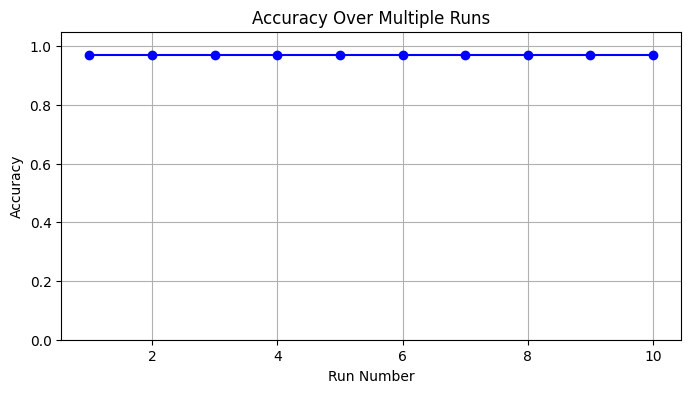

In [10]:
accuracies = []

for run in range(num_runs):
    ...
    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)   # <-- Put this inside your run loop

plt.figure(figsize=(8, 4))
plt.plot(range(1, num_runs + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Multiple Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()


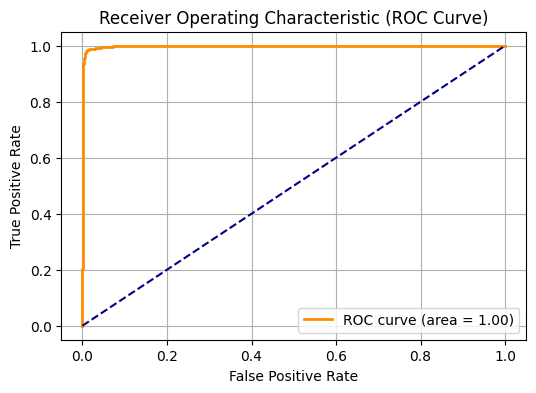

In [11]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities of spam (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


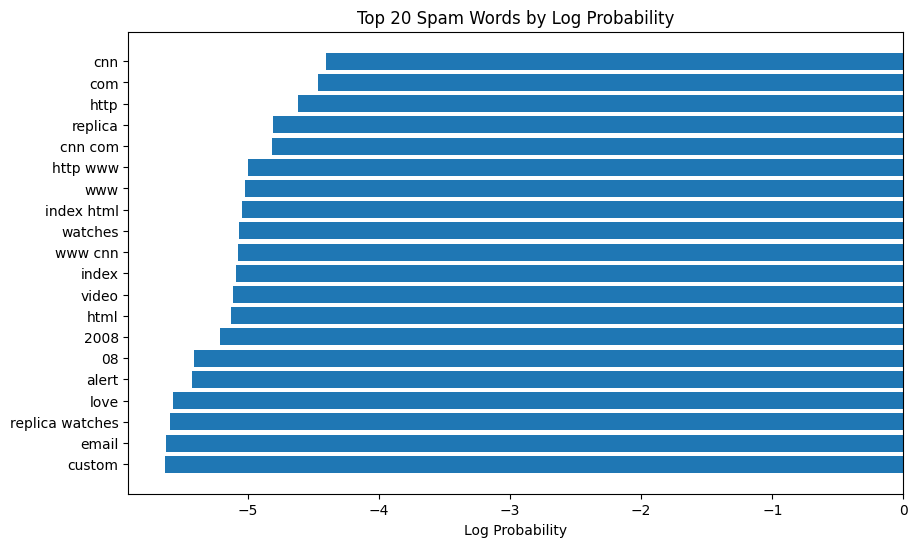

In [12]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get spam log probabilities
spam_word_probs = model.feature_log_prob_[1]  # class 1 is spam

# Get top 20 words
top_indices = spam_word_probs.argsort()[-20:]
top_words = feature_names[top_indices]
top_probs = spam_word_probs[top_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_probs)
plt.xlabel('Log Probability')
plt.title('Top 20 Spam Words by Log Probability')
plt.show()
